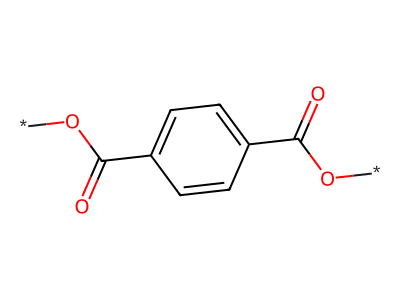

입력 SMILES : *OC(=O)c1ccc(C(=O)O*)cc1
변환된 SMILES: *OC(=O)c1ccc(C(=O)O*)cc1
기본 총 원자 수 (수소 제외, * 포함): 14
수소 포함 총 원자 수 (* 포함): 18
더미 원자(*) 수: 2

최종 원자 수 (수소 포함, * 제외): 16


In [20]:
from rdkit import Chem
from rdkit.Chem import Draw
from collections import Counter
from IPython.display import display # display 함수를 사용하기 위해 import

def visualize_smiles(smiles, size=(400, 300)):
    """
    SMILES 문자열을 시각화하고 RDKit Mol 객체를 반환
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("올바르지 않은 SMILES 문자열입니다.")
    return Draw.MolToImage(mol, size=size), mol

def mol_to_smiles(mol, canonical=True, isomeric=True):
    """
    RDKit Mol 객체를 다시 SMILES 문자열로 변환
    """
    return Chem.MolToSmiles(mol, canonical=canonical, isomericSmiles=isomeric)


# 예: PET의 단위체 SMILES
smiles = "*OC(=O)c1ccc(C(=O)O*)cc1"

# SMILES → 그림 + Mol 객체
img, mol = visualize_smiles(smiles)
display(img)

# Mol → 다시 SMILES
roundtrip_smiles = mol_to_smiles(mol)
print("입력 SMILES :", smiles)
print("변환된 SMILES:", roundtrip_smiles)

# --- 요청하신 원자 수 계산 로직 ---

# 1. RDKit의 기본 GetNumAtoms()는 암시적 수소를 제외하고 더미(*)를 포함합니다.
original_atom_count = mol.GetNumAtoms()
print(f"기본 총 원자 수 (수소 제외, * 포함): {original_atom_count}")

# 2. Chem.AddHs()를 사용해 암시적 수소(예: 벤젠 고리의 수소)를 명시적으로 추가합니다.
mol_with_hs = Chem.AddHs(mol)
total_atoms_with_hs = mol_with_hs.GetNumAtoms()

# 3. 더미 원자(*)의 개수를 셉니다. 더미 원자는 원자 번호(Atomic Number)가 0입니다.
dummy_atom_count = 0
for atom in mol.GetAtoms(): # 원본 mol 객체를 사용해도 됩니다.
    if atom.GetAtomicNum() == 0:
        dummy_atom_count += 1

# 4. (수소 포함 전체 원자 수) - (더미 원자 수) = 최종 원자 수
final_atom_count = total_atoms_with_hs - dummy_atom_count

print(f"수소 포함 총 원자 수 (* 포함): {total_atoms_with_hs}")
print(f"더미 원자(*) 수: {dummy_atom_count}")
print(f"\n최종 원자 수 (수소 포함, * 제외): {final_atom_count}")